In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import json
import os
import seaborn as sns
from numpy import median
import numpy as np
%matplotlib inline

## RESULTS USING THE SIGNAL OF TRUNCATE

In [2]:
env='Ant-v4'
img_prefix =env.upper()
df_comper = pd.DataFrame()
for i in range(1,6):
  path ='COMPER_DDPG/data_using_truncate/'+env+'/train/trial'+str(i)+'/progress.json'
  aux = pd.read_json(path,lines=True)    
  df_comper = pd.concat([df_comper,aux])
df_comper["Method"]="COMCACT"
print(df_comper.shape)

(1390, 17)


In [3]:
df_ddpg = pd.DataFrame()
for i in range(1,6):
  path ='DPPG/data_using_truncate/'+env+'/train/trial'+str(i)+'/progress.json'
  aux = pd.read_json(path,lines=True)    
  df_ddpg = pd.concat([df_ddpg,aux])
df_ddpg["Method"]="DDPG"
print(df_ddpg.shape)

(1381, 17)


In [4]:
df_comper.head()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
0,1,1,Ant-v4,14-07-2023 22:31:09,200,0,200,0.009941,1,201,False,96.645216,96.645216,96.645216,96.645216,96.645216,COMCACT
1,1,2,Ant-v4,14-07-2023 22:36:34,400,0,400,0.019882,1,401,False,282.980117,189.812666,189.812666,189.812666,189.812666,COMCACT
2,1,3,Ant-v4,14-07-2023 22:41:56,600,0,599,0.029822,1,601,False,166.355116,181.993483,181.993483,181.993483,181.993483,COMCACT
3,1,4,Ant-v4,14-07-2023 22:47:23,800,0,797,0.039763,1,801,False,218.069126,191.012394,191.012394,191.012394,191.012394,COMCACT
4,1,5,Ant-v4,14-07-2023 22:52:42,1000,0,996,0.049704,1,1001,True,375.408745,227.891664,227.891664,227.891664,227.891664,COMCACT


In [5]:
df_ddpg.head()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
0,1,1,Ant-v4,14-07-2023 13:23:27,200,201,0,0.009941,1,201,False,95.702389,95.702389,95.702389,95.702389,95.702389,DDPG
1,1,2,Ant-v4,14-07-2023 13:23:46,400,396,0,0.019882,1,401,False,139.240996,117.471692,117.471692,117.471692,117.471692,DDPG
2,1,3,Ant-v4,14-07-2023 13:24:04,600,589,0,0.029822,1,601,False,315.297255,183.413547,183.413547,183.413547,183.413547,DDPG
3,1,4,Ant-v4,14-07-2023 13:24:23,800,786,0,0.039763,1,801,False,492.046914,260.571888,260.571888,260.571888,260.571888,DDPG
4,1,5,Ant-v4,14-07-2023 13:24:42,1000,984,0,0.049704,1,1001,True,655.208081,339.499127,339.499127,339.499127,339.499127,DDPG


In [6]:
df=pd.concat([df_comper,df_ddpg])
df.head()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
0,1,1,Ant-v4,14-07-2023 22:31:09,200,0,200,0.009941,1,201,False,96.645216,96.645216,96.645216,96.645216,96.645216,COMCACT
1,1,2,Ant-v4,14-07-2023 22:36:34,400,0,400,0.019882,1,401,False,282.980117,189.812666,189.812666,189.812666,189.812666,COMCACT
2,1,3,Ant-v4,14-07-2023 22:41:56,600,0,599,0.029822,1,601,False,166.355116,181.993483,181.993483,181.993483,181.993483,COMCACT
3,1,4,Ant-v4,14-07-2023 22:47:23,800,0,797,0.039763,1,801,False,218.069126,191.012394,191.012394,191.012394,191.012394,COMCACT
4,1,5,Ant-v4,14-07-2023 22:52:42,1000,0,996,0.049704,1,1001,True,375.408745,227.891664,227.891664,227.891664,227.891664,COMCACT


In [7]:
df.tail()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
275,5,276,Ant-v4,14-07-2023 21:28:55,49200,47955,0,0.999,50,201,False,-122.534700,98.911703,96.794399,169.577578,281.979315,DDPG
276,5,277,Ant-v4,14-07-2023 21:29:23,49400,48152,0,0.999,50,401,False,-96.172823,98.207427,93.564977,162.944282,244.569308,DDPG
277,5,278,Ant-v4,14-07-2023 21:29:51,49600,48344,0,0.999,50,601,False,28.138188,97.955379,90.248107,157.045126,205.753258,DDPG
278,5,279,Ant-v4,14-07-2023 21:30:19,49800,48537,0,0.999,50,801,False,137.107106,98.095708,87.071833,150.986191,163.363527,DDPG
279,5,280,Ant-v4,14-07-2023 21:30:47,50000,48729,0,0.999,50,1001,True,141.688698,98.251397,83.111009,142.028020,109.089424,DDPG


In [8]:
#fig, axs = plt.subplots(nrows=2,ncols=2)
#fig.set_figwidth(15)
#fig.set_figheight(10)
#sns.lineplot(data=df, x="TotalItr", y="EpRew",hue='Method',ax=axs[0][0])
#sns.lineplot(data=df, x="TotalItr", y="Avg100Ep",hue="Method",ax=axs[0][1])
#sns.lineplot(data=df, x="TotalItr", y="AvgLast50Ep",hue="Method",ax=axs[1][0])
#sns.lineplot(data=df, x="TotalItr", y="AvgLast10Ep",hue="Method",ax=axs[1][1])


In [9]:
path ='COMPER_DDPG/data_using_truncate/'+env+'/eval/progress.json'
df_comper_eval = pd.read_json(path,lines=True)
df_comper_eval["Method"]="COMCACT"
print(df_comper_eval.shape)
df_comper_eval.head()

(50, 6)


,Trial,Time,Task,Int,EvalAvgRew,Method
0,1,15-07-2023 00:40:29,Ant-v4,5000,-0.668109,COMCACT
1,1,15-07-2023 02:54:45,Ant-v4,10000,4.180469,COMCACT
2,1,15-07-2023 05:09:27,Ant-v4,15000,0.837821,COMCACT
3,1,15-07-2023 07:24:53,Ant-v4,20000,1.809756,COMCACT
4,1,15-07-2023 09:38:25,Ant-v4,25000,4.042800,COMCACT


In [10]:
df_comper_eval.describe()

,Trial,Int,EvalAvgRew
count,50.000000,50.000000,50.000000
mean,3.000000,27500.000000,2.454606
std,1.428571,14507.211437,2.845154
min,1.000000,5000.000000,-6.342969
25%,2.000000,15000.000000,0.427687
50%,3.000000,27500.000000,2.856740
75%,4.000000,40000.000000,4.607822
max,5.000000,50000.000000,7.234362


In [11]:
path ='DPPG/data_using_truncate/'+env+'/eval/progress.json'
df_ddpg_eval = pd.read_json(path,lines=True)
df_ddpg_eval["Method"]="DDPG"
print(df_ddpg_eval.shape)
df_ddpg_eval.head()

(50, 6)


,Trial,Time,Task,Int,EvalAvgRew,Method
0,1,14-07-2023 13:31:14,Ant-v4,5000,1.128854,DDPG
1,1,14-07-2023 13:39:48,Ant-v4,10000,-5.290122,DDPG
2,1,14-07-2023 13:48:24,Ant-v4,15000,2.039861,DDPG
3,1,14-07-2023 13:57:23,Ant-v4,20000,-0.258820,DDPG
4,1,14-07-2023 14:06:48,Ant-v4,25000,2.895991,DDPG


In [12]:
df_ddpg_eval.describe()

,Trial,Int,EvalAvgRew
count,50.000000,50.000000,50.000000
mean,3.000000,27500.000000,1.925171
std,1.428571,14507.211437,3.402564
min,1.000000,5000.000000,-8.717143
25%,2.000000,15000.000000,0.630666
50%,3.000000,27500.000000,2.968304
75%,4.000000,40000.000000,4.297463
max,5.000000,50000.000000,6.073229


In [13]:
df_eval=pd.concat([df_comper_eval,df_ddpg_eval])
df_eval.rename(columns = {'Int':'Itr'}, inplace = True)

<Axes: xlabel='Itr', ylabel='EvalAvgRew'>

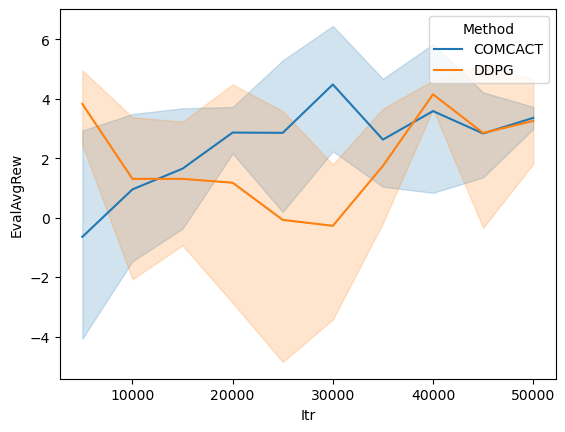

In [14]:
sns.lineplot(data=df_eval, x="Itr", y="EvalAvgRew",hue='Method')

## USING ROLLING AVERAGE

In [15]:
df_comper_rolling_avg = pd.DataFrame(df_comper[["TotalItr","EpRew","Method"]])
df_comper_rolling_avg["EpRewRolling"]=df_comper_rolling_avg['EpRew'].rolling(100).mean()
df_comper_rolling_avg.dropna(inplace=True)
df_comper_rolling_avg.head()

,TotalItr,EpRew,Method,EpRewRolling
99,15200,-27.665060,COMCACT,278.195223
100,15400,23.558446,COMCACT,277.464355
101,15600,119.796105,COMCACT,275.832515
102,15800,268.409823,COMCACT,276.853062
103,16000,366.925568,COMCACT,278.341626


In [16]:
df_ddpg_rolling_avg=pd.DataFrame(df_ddpg[["TotalItr","EpRew","Method"]])
df_ddpg_rolling_avg["EpRewRolling"]=df_ddpg_rolling_avg["EpRew"].rolling(100).mean()
df_ddpg_rolling_avg.dropna(inplace=True)
df_ddpg_rolling_avg.head()

,TotalItr,EpRew,Method,EpRewRolling
99,20000,217.275105,DDPG,209.241543
100,20200,-8.299968,DDPG,208.201519
101,20400,23.143374,DDPG,207.040543
102,20572,-18.353328,DDPG,203.704037
103,20573,-17.213064,DDPG,198.611438


In [17]:
df_rolling=pd.concat([df_comper_rolling_avg,df_ddpg_rolling_avg])
df_rolling.head()

,TotalItr,EpRew,Method,EpRewRolling
99,15200,-27.665060,COMCACT,278.195223
100,15400,23.558446,COMCACT,277.464355
101,15600,119.796105,COMCACT,275.832515
102,15800,268.409823,COMCACT,276.853062
103,16000,366.925568,COMCACT,278.341626


In [18]:
df_rolling.tail()

,TotalItr,EpRew,Method,EpRewRolling
275,49200,-122.534700,DDPG,96.794399
276,49400,-96.172823,DDPG,93.564977
277,49600,28.138188,DDPG,90.248107
278,49800,137.107106,DDPG,87.071833
279,50000,141.688698,DDPG,83.111009


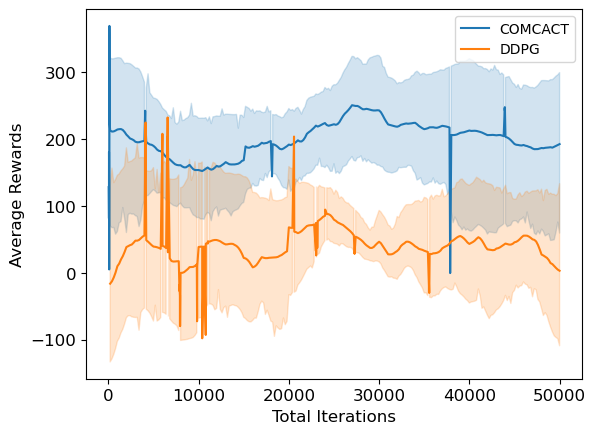

In [19]:
fig = plt.Figure()
fig.set_figwidth(15)
fig.set_figheight(10)
sns.lineplot(data=df_rolling, x="TotalItr", y="EpRewRolling",hue='Method')

plt.xlabel( xlabel = 'Total Iterations',fontsize=12) 
plt.ylabel(ylabel='Average Rewards',fontsize=12)
plt.legend(fontsize=10)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
fig.set_dpi(300)
plt.savefig("GRAPHICS/using_truncate/"+img_prefix+"-TRUNCATE-TRAINING.png")

In [20]:
df_comper_eval_rolling_avg = pd.DataFrame(df_comper_eval[["Int","EvalAvgRew","Method"]])
df_comper_eval_rolling_avg["EpRewRolling"]=df_comper_eval["EvalAvgRew"].rolling(2).mean()
df_comper_eval_rolling_avg.dropna(inplace=True)
df_comper_eval_rolling_avg.head()

,Int,EvalAvgRew,Method,EpRewRolling
1,10000,4.180469,COMCACT,1.756180
2,15000,0.837821,COMCACT,2.509145
3,20000,1.809756,COMCACT,1.323788
4,25000,4.042800,COMCACT,2.926278
5,30000,6.594195,COMCACT,5.318497


In [21]:
df_ddpg_eval_rolling_avg = pd.DataFrame(df_ddpg_eval[["Int","EvalAvgRew","Method"]])
df_ddpg_eval_rolling_avg["EpRewRolling"]=df_ddpg_eval["EvalAvgRew"].rolling(2).mean()
df_ddpg_eval_rolling_avg.dropna(inplace=True)
df_ddpg_eval_rolling_avg.head()

,Int,EvalAvgRew,Method,EpRewRolling
1,10000,-5.290122,DDPG,-2.080634
2,15000,2.039861,DDPG,-1.625131
3,20000,-0.258820,DDPG,0.890520
4,25000,2.895991,DDPG,1.318585
5,30000,0.837352,DDPG,1.866672


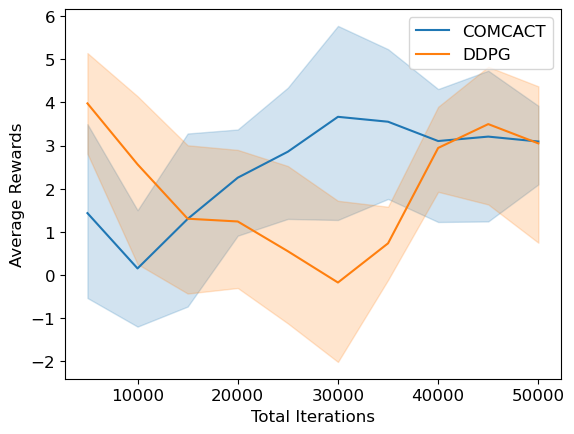

In [22]:
df_eval_rolling=pd.concat([df_comper_eval_rolling_avg,df_ddpg_eval_rolling_avg])
sns.lineplot(data=df_eval_rolling, x="Int", y="EpRewRolling",hue='Method')

plt.xlabel( xlabel = 'Total Iterations',fontsize=12) 
plt.ylabel(ylabel='Average Rewards',fontsize=12)
plt.legend(fontsize=12)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
fig.set_dpi(300)
plt.savefig("GRAPHICS/using_truncate/"+img_prefix+"-TRUNCATE-EVALUATION.png")

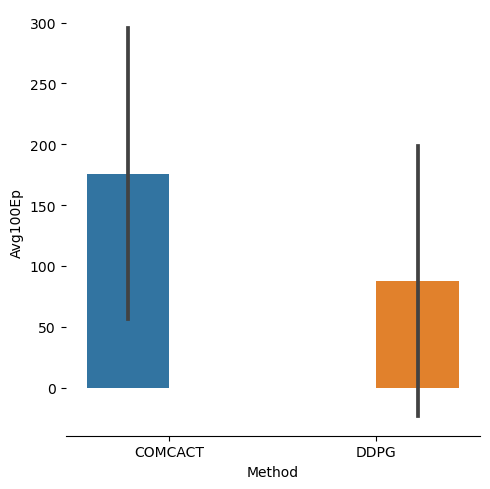

In [23]:
g = sns.catplot(data=df, kind="bar",x="Method", y="Avg100Ep", hue="Method",
    errorbar="sd")
g.despine(left=True)

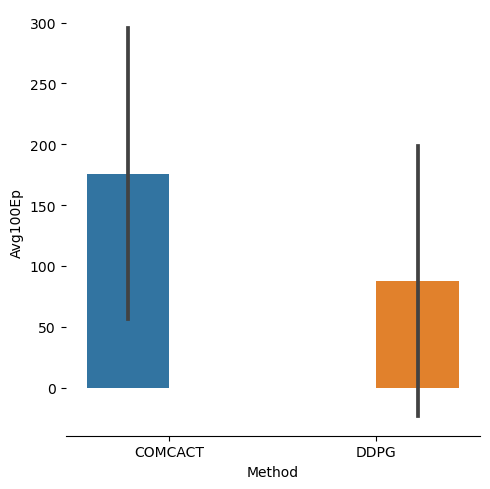

In [24]:
g = sns.catplot(data=df, kind="bar",x="Method", y="Avg100Ep", hue="Method",
    errorbar="sd")
g.despine(left=True)